# TASK 1 :TITANIC SURVIVAL PREDICTION

In [1]:
#import nesscary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report


In [2]:
#import dataset
data=pd.read_csv("tested.csv")

In [3]:
data.head() #getting the first five smaples of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.info() #getting the column info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
data.shape #getting the no.of Samples and features

(418, 12)

In [6]:
#droppig the unnesscary cabin column
df=data.drop(["Cabin"],axis=1)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [8]:
#re-orderiing the column
order=["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Embarked","Survived"]
df=df.reindex(columns=order)

In [9]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


# DATA VISUALIZATION

<Axes: >

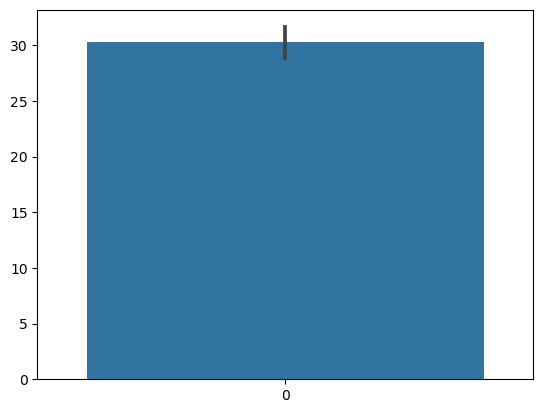

In [10]:
sns.barplot(df["Age"])

<Axes: >

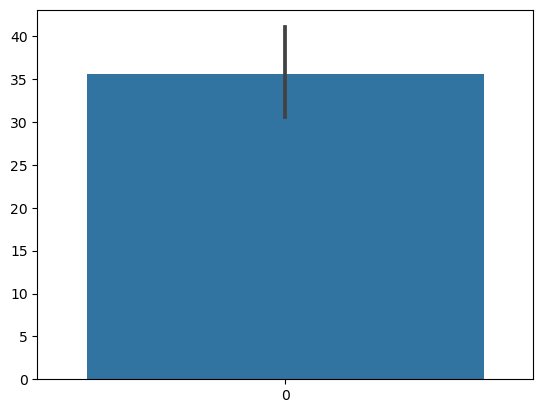

In [11]:
sns.barplot(df["Fare"])

<Axes: ylabel='Fare'>

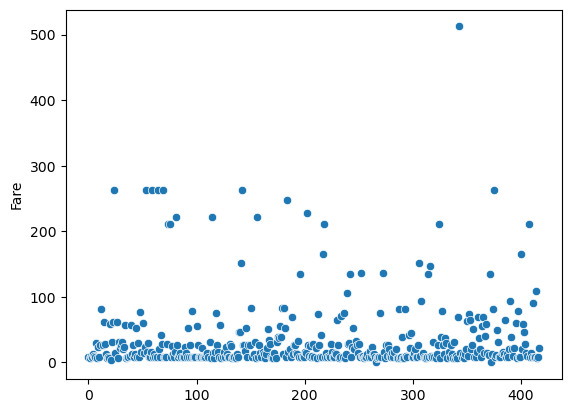

In [12]:
sns.scatterplot(df["Fare"])

In [13]:
df.corr(numeric_only=True) #gives the relation between the columns

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211,-0.023245
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147,-0.108615
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932,-0.000013
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539,0.099943
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046,0.159120
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000,0.191514
Survived,-0.023245,-0.108615,-0.000013,0.099943,0.159120,0.191514,1.000000


<Axes: >

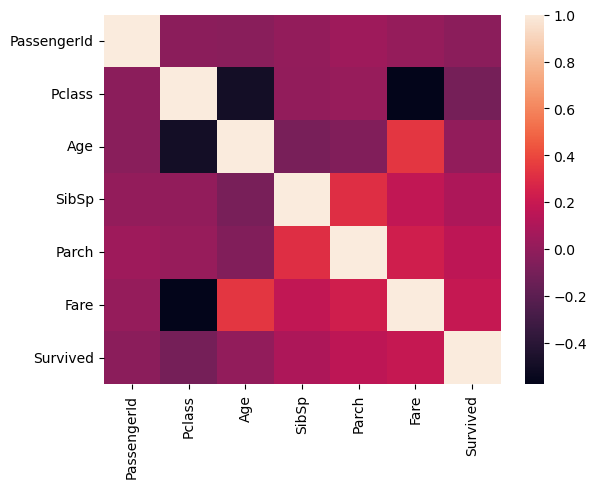

In [14]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: >

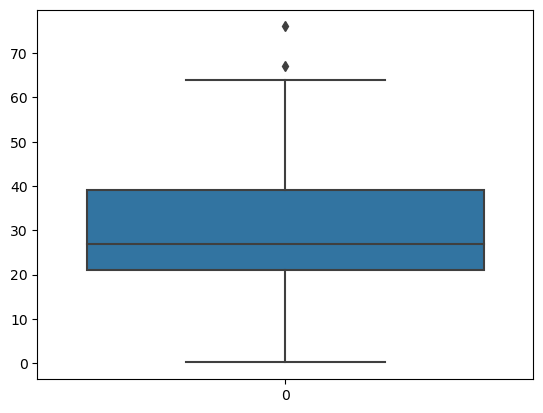

In [15]:
sns.boxplot(df["Age"]) #checking for the outlayers

<Axes: >

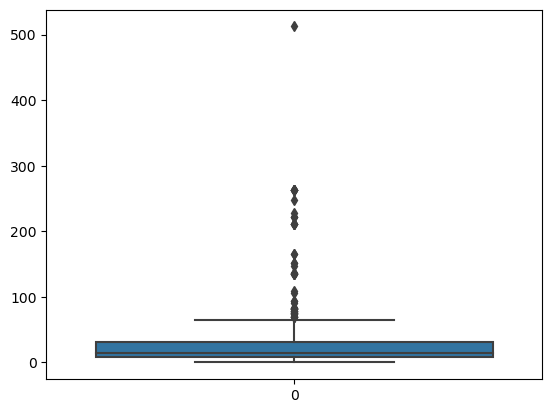

In [16]:
sns.boxplot(df["Fare"])

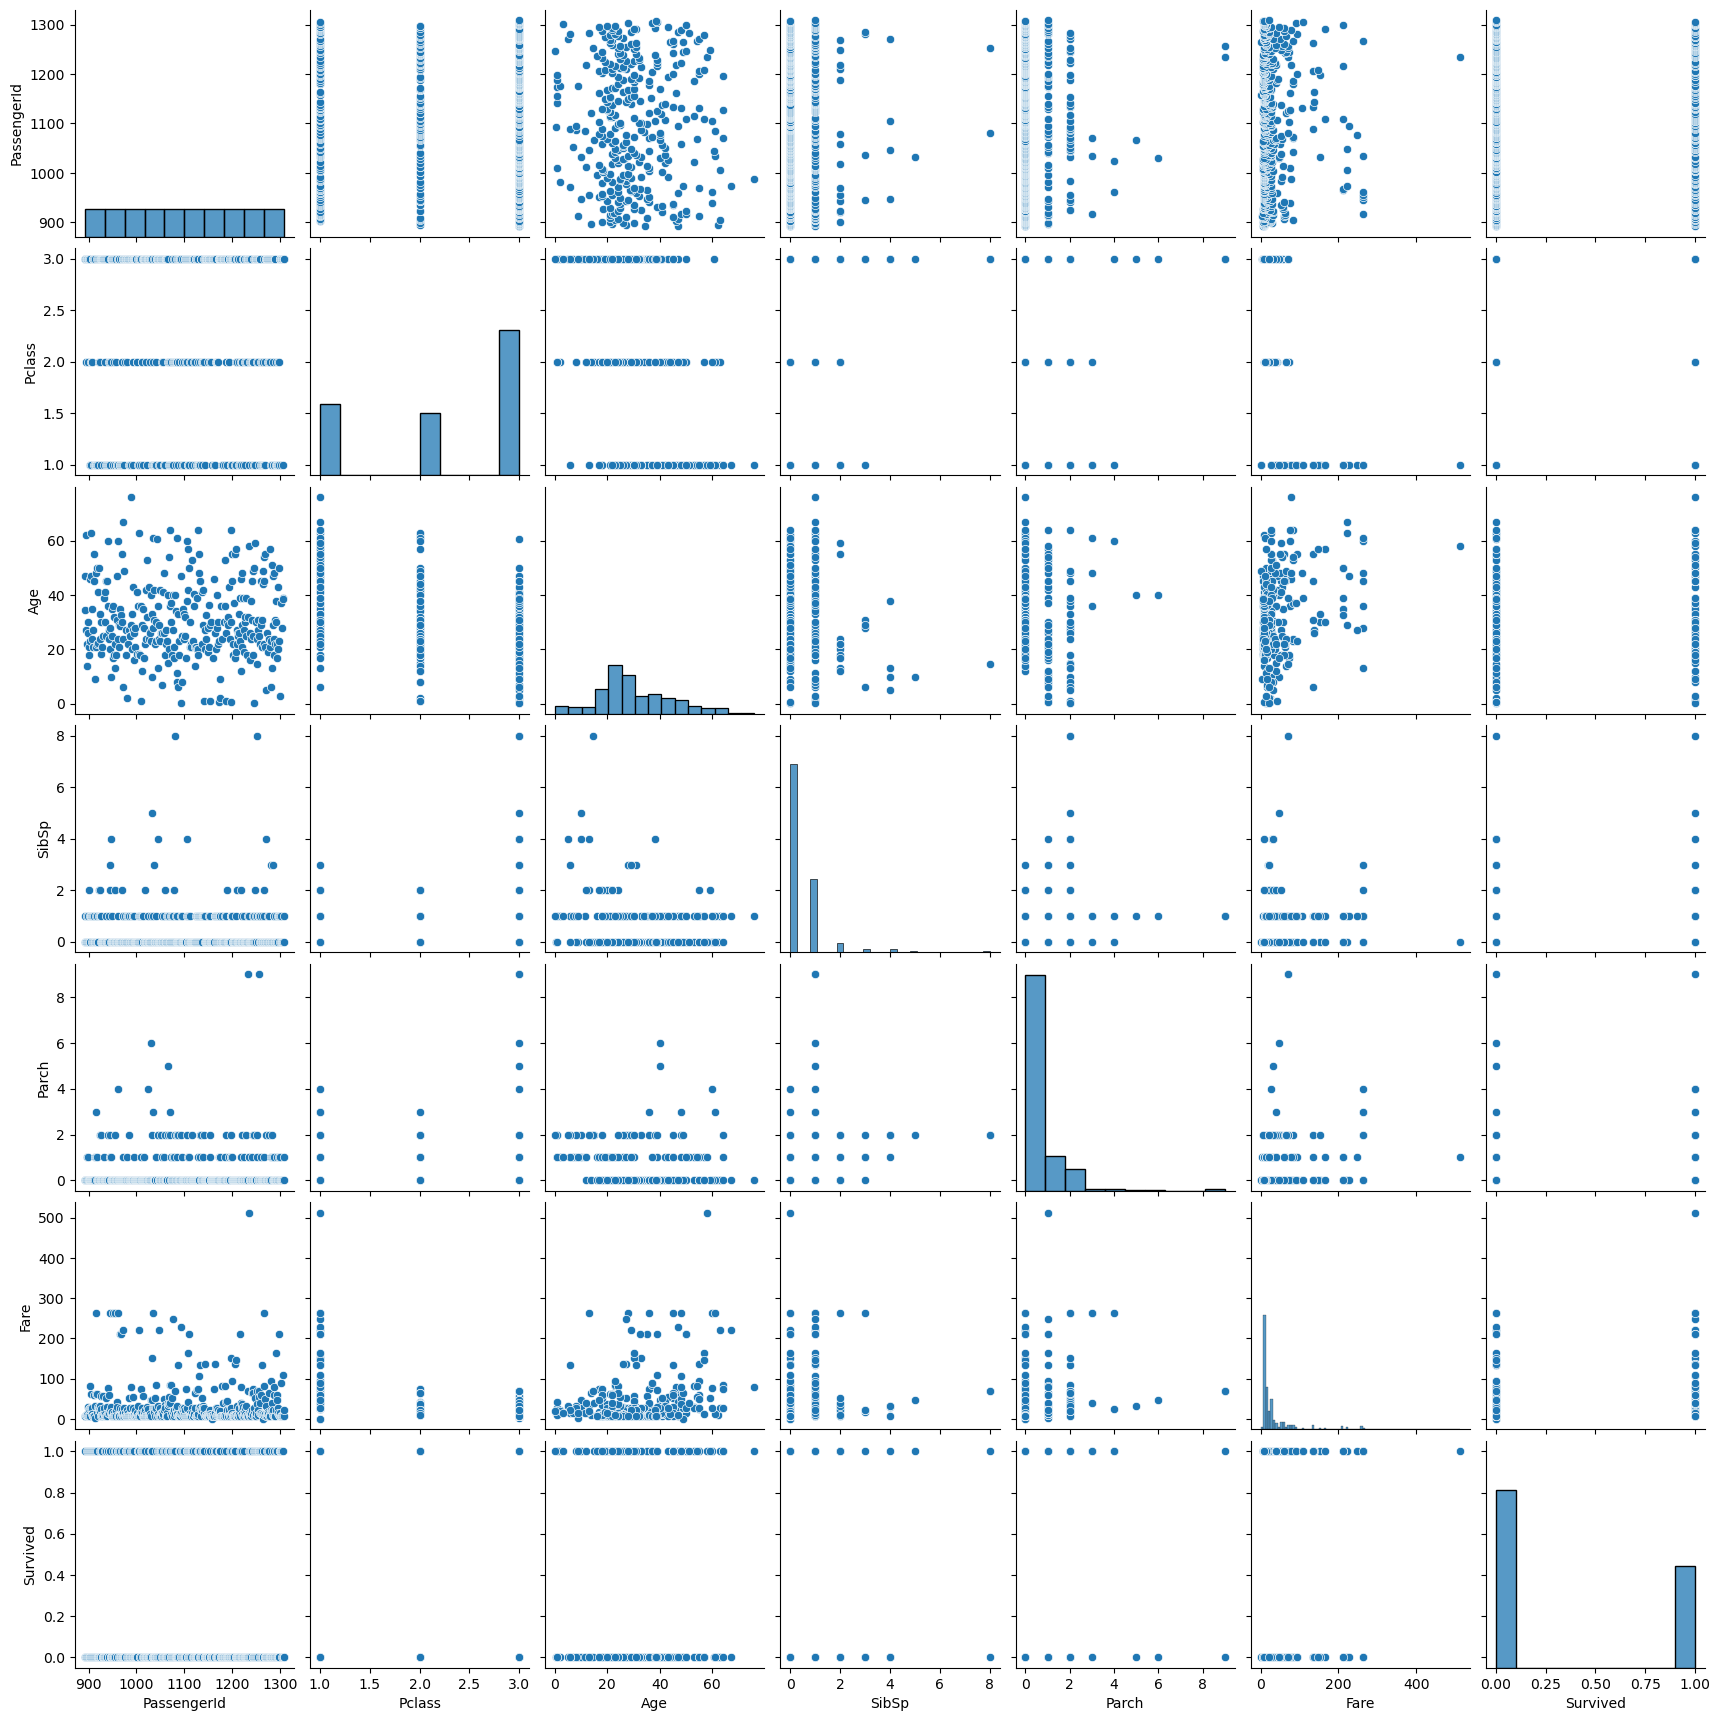

In [17]:
sns.pairplot(df) #it give the graph with respctive each column of data

# HANDLING NULL VALUES

In [18]:
df.isnull().any() #finding the any null values in the data

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Embarked       False
Survived       False
dtype: bool

In [19]:
df.isnull().sum() #finding the sum of null values in a column

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
Survived        0
dtype: int64

In [20]:
#to remove these null values drop the column form the dataset
df=df.drop(["Age","Fare"],axis=1)

In [21]:
df.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,0,0,330911,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,Q,0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,S,1


# OUTLAYERS DETECTION

<Axes: >

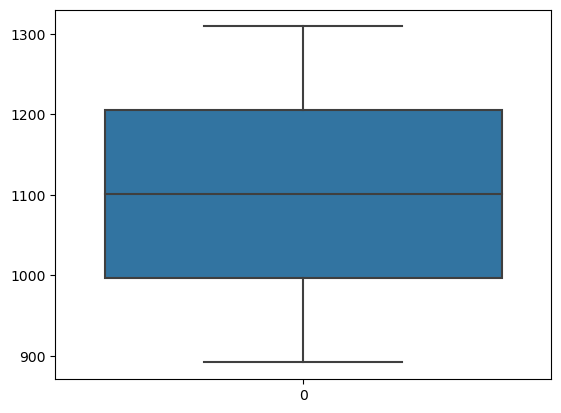

In [22]:
sns.boxplot(df["PassengerId"]) #we will check outlayers by the boxplot

<Axes: >

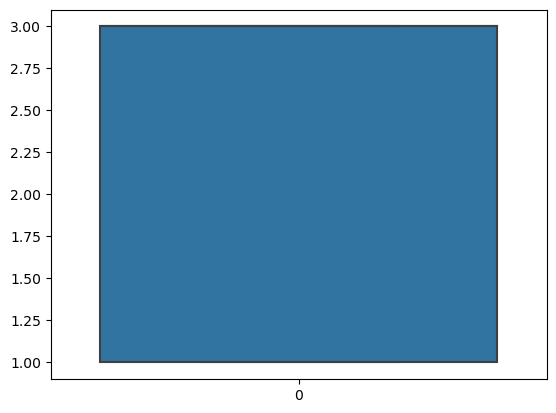

In [23]:
sns.boxplot(df["Pclass"])

<Axes: >

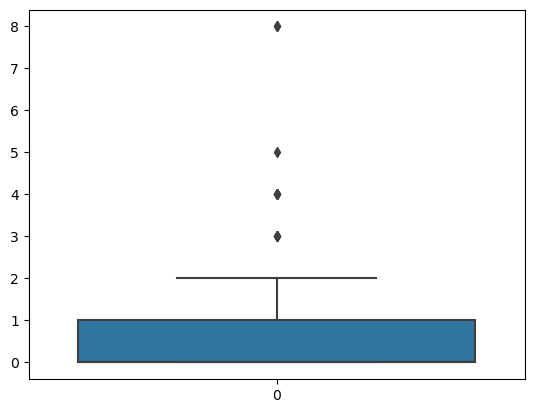

In [24]:
sns.boxplot(df["SibSp"])

In [25]:
df.median(numeric_only=True)

PassengerId    1100.5
Pclass            3.0
SibSp             0.0
Parch             0.0
Survived          0.0
dtype: float64

In [26]:
q1_SibSp=df.SibSp.quantile(0.25)
q3_SibSp=df.SibSp.quantile(0.75)
iqr_SibSp=q3_SibSp-q1_SibSp
upper_limit_SibSp=q3_SibSp+1.5*iqr_SibSp
lower_limit_SibSp=q1_SibSp-1.5*iqr_SibSp
df["SibSp"]=np.where(data["SibSp"]>upper_limit_SibSp,0.0,data["SibSp"])

<Axes: >

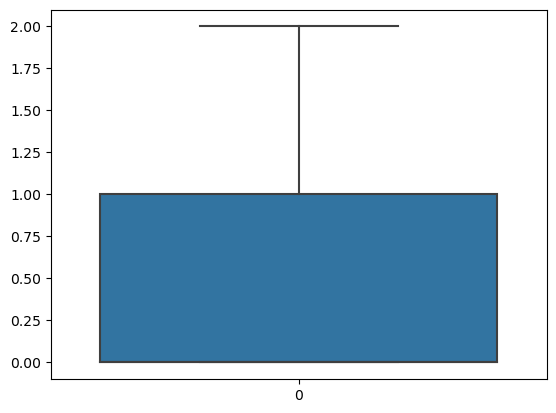

In [27]:
sns.boxplot(df["SibSp"])

<Axes: >

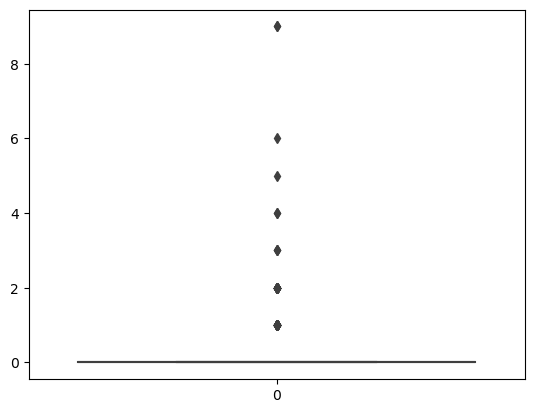

In [28]:
sns.boxplot(df["Parch"])

In [29]:
q1_Parch=df.Parch.quantile(0.25)
q3_Parch=df.Parch.quantile(0.75)
iqr_Parch=q3_Parch-q1_Parch
upper_limit_Parch=q3_Parch+1.5*iqr_Parch
lower_limit_Parch=q1_Parch-1.5*iqr_Parch
df["Parch"]=np.where(data["Parch"]>upper_limit_Parch,0.0,data["Parch"])

<Axes: >

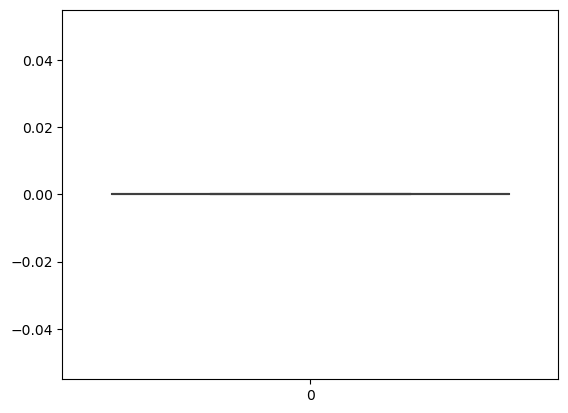

In [30]:
sns.boxplot(df["Parch"])

# SEPERATING THE DEPENDENT AND INDEPENDENT VARIABLE

In [31]:
df.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,0.0,0.0,330911,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1.0,0.0,363272,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,0.0,0.0,240276,Q,0
3,895,3,"Wirz, Mr. Albert",male,0.0,0.0,315154,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,0.0,3101298,S,1


In [32]:
x=df.iloc[:,0:8] #independent variable
y=df["Survived"] #dependent variable

In [33]:
x.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
0,892,3,"Kelly, Mr. James",male,0.0,0.0,330911,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1.0,0.0,363272,S
2,894,2,"Myles, Mr. Thomas Francis",male,0.0,0.0,240276,Q
3,895,3,"Wirz, Mr. Albert",male,0.0,0.0,315154,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,0.0,3101298,S


In [34]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [35]:
x.shape

(418, 8)

In [36]:
y.shape

(418,)

# ENCODING

In [37]:
#Label Encoding to convert categorical to the numerical
le=LabelEncoder()
x.Name=le.fit_transform(x.Name)
x.Ticket=le.fit_transform(x.Ticket)
x.Sex=le.fit_transform(x.Sex)
x.Embarked=le.fit_transform(x.Embarked)

In [38]:
x.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
0,892,3,206,1,0.0,0.0,152,1
1,893,3,403,0,1.0,0.0,221,2
2,894,2,269,1,0.0,0.0,73,1
3,895,3,408,1,0.0,0.0,147,2
4,896,3,178,0,1.0,0.0,138,2


# SPLITTING THE TRAINING AND TESTING DATASET

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=None)

In [40]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(334, 8) (84, 8) (334,) (84,)


In [41]:
x_train.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
281,1173,3,295,1,1.0,0.0,351,2
12,904,1,352,0,1.0,0.0,52,2
416,1308,3,384,1,0.0,0.0,220,2
71,963,3,263,1,0.0,0.0,194,2
349,1241,2,383,0,0.0,0.0,299,2


In [42]:
x_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
30,922,2,236,1,1.0,0.0,338,2
111,1003,3,346,0,0.0,0.0,156,1
256,1148,3,243,1,0.0,0.0,276,1
135,1027,3,62,1,0.0,0.0,216,2
318,1210,3,197,1,0.0,0.0,215,2


In [43]:
y_train.head()

281    0
12     1
416    0
71     0
349    1
Name: Survived, dtype: int64

# MODEL BUILDING

In [45]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [46]:
pred=nb.predict(x_test)
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [47]:
matrix=pd.DataFrame(pred,y_test)
matrix

,0
Survived,
0,0
1,1
0,0
0,0
0,0
...,...
0,0
0,0
0,0


In [49]:
accuracy_score(pred,y_test)

1.0

In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

